In [2]:
# import all the necessary libraries
import sqlite3
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
#connect to a SQLite database called shopping and create a cursor db
conn = sqlite3.connect('shopping.db')
cursor = conn.cursor()

In [8]:

# Query to list all tables in the database
cursor.execute("SELECT name FROM sqlite_master WHERE type='table'")

# Print the table names
print("Tables in the database:")
for table in cursor.fetchall():
    print(table[0])



Tables in the database:
customers
order_items
orders
payment
products
reviews
shipments
suppliers


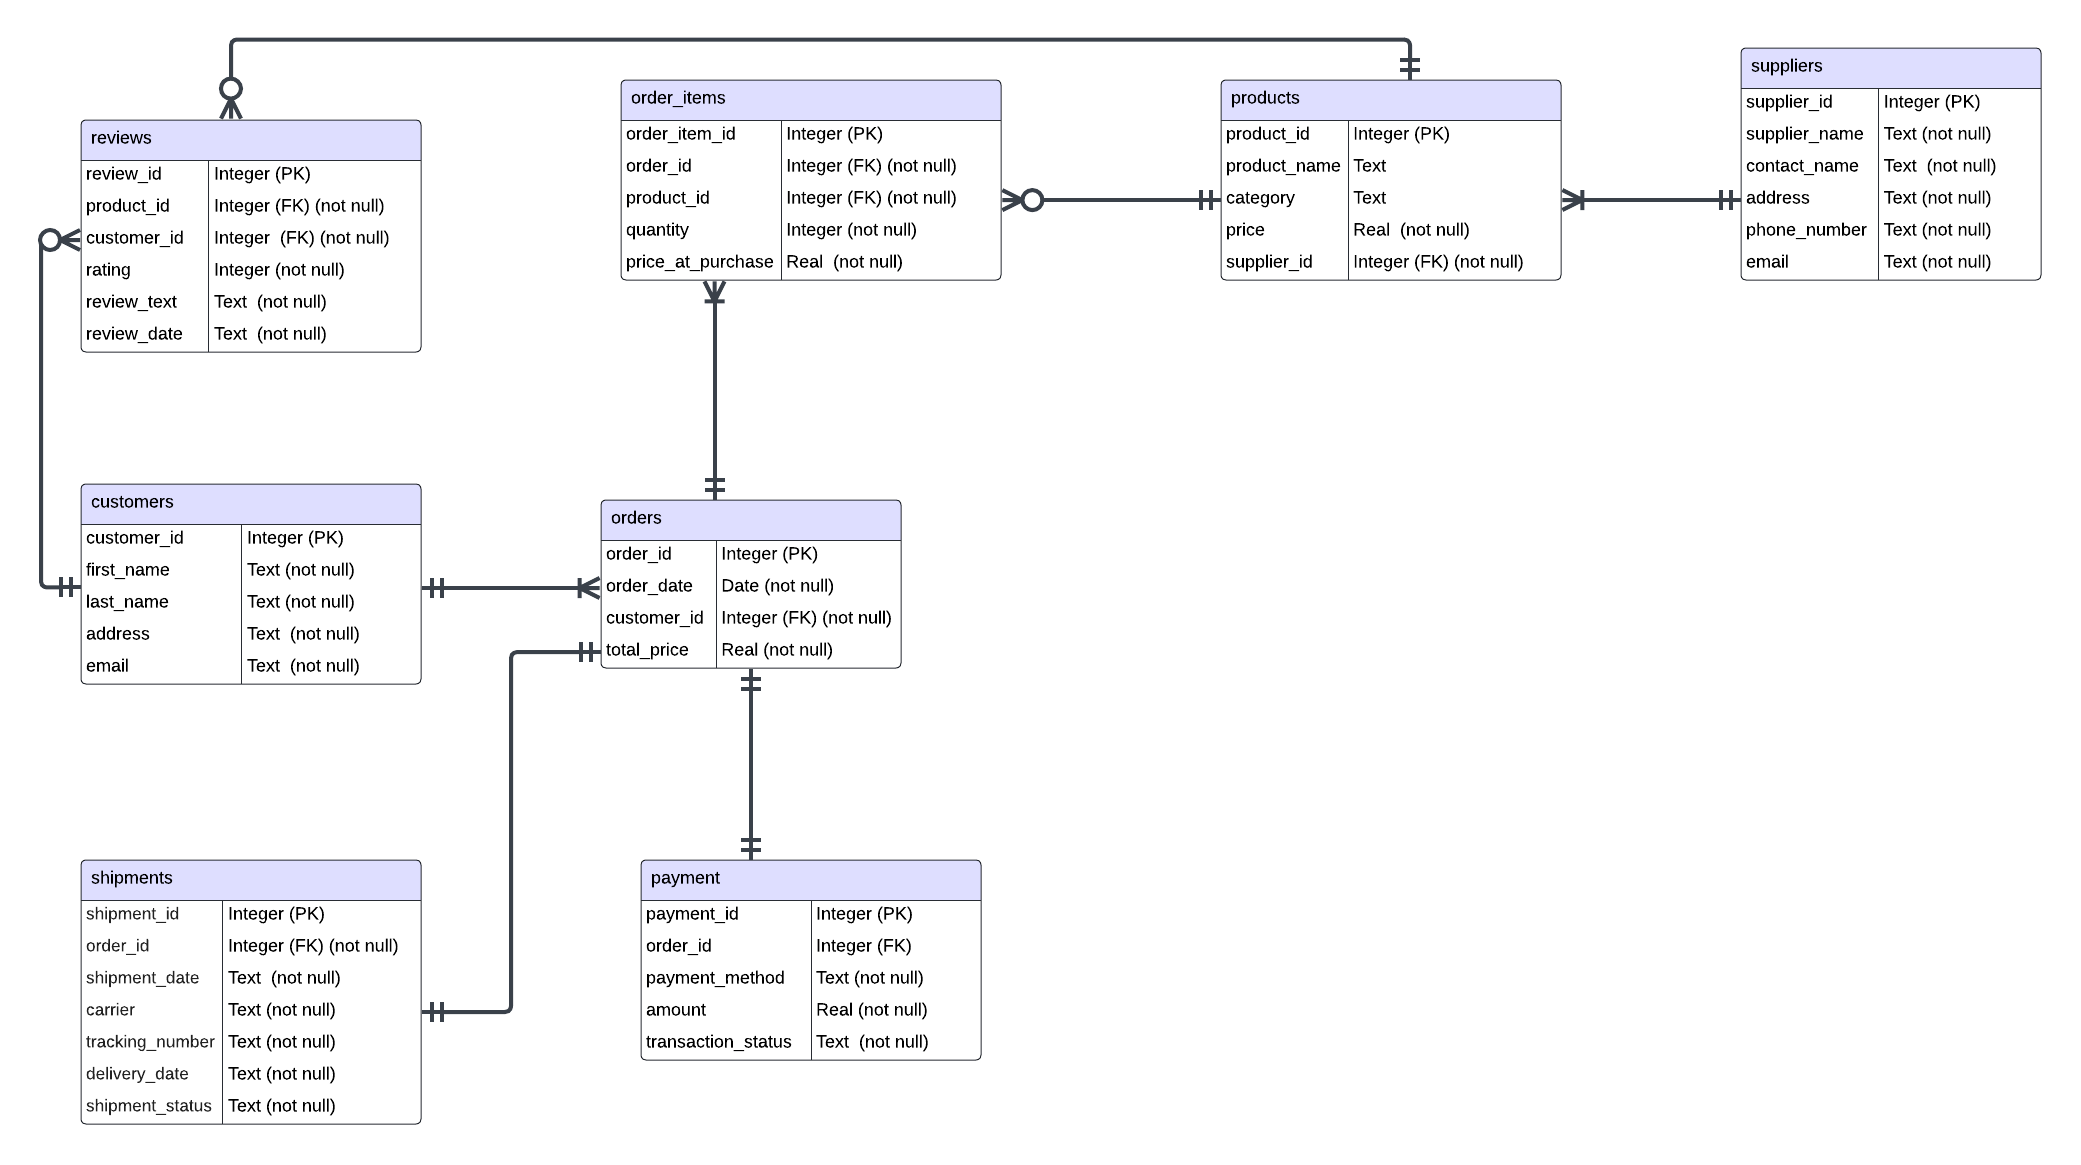

## Create tables:

In [11]:

# Creating tables 

#1. Customer table
# customer_id: unique identifier for each customer
cursor.execute('''
CREATE TABLE IF NOT EXISTS customers
(
    customer_id INTEGER PRIMARY KEY , 
    first_name TEXT NOT NULL,
    last_name TEXT NOT NULL,
    address TEXT NOT NULL,
    email TEXT NOT NULL UNIQUE,
    phone_number TEXT NOT NULL
)
''')

#2. Order_items table:
#order_item_id: unique identifier for each order item
cursor.execute('''
CREATE TABLE IF NOT EXISTS order_items
(
    order_item_id INTEGER PRIMARY KEY ,
    order_id INTEGER NOT NULL,
    product_id INTEGER NOT NULL,
    quantity INTEGER NOT NULL,
    price_at_purchase REAL NOT NULL,
    FOREIGN KEY (order_id) REFERENCES orders(order_id),
    FOREIGN KEY (product_id) REFERENCES products(product_id) 
)
''')

#3. orders table : 
# order_id: unique identifier for each order item
cursor.execute('''
CREATE TABLE IF NOT EXISTS orders
(
    order_id INTEGER PRIMARY KEY ,
    order_date DATE NOT NULL,
    customer_id INTEGER NOT NULL,
    total_price REAL NOT NULL,
    FOREIGN KEY (customer_id) REFERENCES customers(customer_id) 
)
''')


#payment table:
cursor.execute('''
CREATE TABLE IF NOT EXISTS payment
(
    payment_id INTEGER PRIMARY KEY ,
    order_id INTEGER NOT NULL,
    payment_method TEXT NOT NULL,
    amount REAL NOT NULL,
    transaction_status TEXT NOT NULL,
    FOREIGN KEY (order_id) REFERENCES orders(order_id) 
)
''')

#products table
cursor.execute('''
CREATE TABLE IF NOT EXISTS products
(
    product_id INTEGER PRIMARY KEY ,
    product_name TEXT NOT NULL,
    category TEXT NOT NULL,
    price REAL NOT NULL,
    supplier_id INTEGER NOT NULL,
    FOREIGN KEY (supplier_id) REFERENCES suppliers(supplier_id)
)
''')

#reviews table
cursor.execute('''
CREATE TABLE IF NOT EXISTS reviews
(
    review_id INTEGER PRIMARY KEY ,
    product_id INTEGER NOT NULL,
    customer_id INTEGER NOT NULL,
    rating INTEGER NOT NULL,
    review_text TEXT,
    review_date TEXT NOT NULL,
    FOREIGN KEY (product_id) REFERENCES products(product_id) ,
    FOREIGN KEY (customer_id) REFERENCES customers(customer_id) 
)
''')

# shipments table:
cursor.execute('''
CREATE TABLE IF NOT EXISTS shipments
(
    shipment_id INTEGER PRIMARY KEY ,
    order_id INTEGER NOT NULL,
    shipment_date TEXT NOT NULL,
    carrier TEXT NOT NULL,
    tracking_number TEXT NOT NULL UNIQUE,
    delivery_date TEXT,
    shipment_status TEXT NOT NULL,
    FOREIGN KEY (order_id) REFERENCES orders(order_id) 
)
''')


# suppliers table:
cursor.execute('''
CREATE TABLE IF NOT EXISTS suppliers
(
    supplier_id INTEGER PRIMARY KEY ,
    supplier_name TEXT NOT NULL,
    contact_name TEXT NOT NULL,
    address TEXT NOT NULL,
    phone_number TEXT NOT NULL,
    email TEXT NOT NULL 
)
''')



## Populate the tables:

In [13]:

# Populate customers table

customers_path = 'customers.csv'
with open(customers_path, 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    cursor.executemany('''
    INSERT OR IGNORE INTO customers (first_name, last_name, address, email, phone_number)
    VALUES (:first_name, :last_name, :address, :email, :phone_number)
    ''', reader)
conn.commit()


# Populate orders table

orders_path = 'orders.csv'
with open(orders_path, 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    cursor.executemany('''
    INSERT OR IGNORE INTO orders (order_date, customer_id, total_price)
    VALUES (:order_date, :customer_id, :total_price)
    ''', reader)
conn.commit()



# Populate order_items table

order_items_path = 'order_items.csv'
with open(order_items_path, 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    cursor.executemany('''
    INSERT OR IGNORE INTO order_items (order_id, product_id, quantity, price_at_purchase)
    VALUES (:order_id, :product_id, :quantity, :price_at_purchase)
    ''', reader)
conn.commit()

# Populate payment table
payment_path = 'payment.csv'
with open(payment_path, 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    cursor.executemany('''
    INSERT OR IGNORE INTO payment (order_id, payment_method, amount, transaction_status)
    VALUES (:order_id, :payment_method, :amount, :transaction_status)
    ''', reader)
conn.commit()

# Populate products table
products_path = 'products.csv'
with open(products_path, 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    cursor.executemany('''
    INSERT OR IGNORE INTO products (product_name, category, price, supplier_id)
    VALUES (:product_name, :category, :price, :supplier_id)
    ''', reader)
conn.commit()

# Populate reviews table
reviews_path = 'reviews.csv'
with open(reviews_path, 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    cursor.executemany('''
    INSERT OR IGNORE INTO reviews (product_id, customer_id, rating, review_text, review_date)
    VALUES (:product_id, :customer_id, :rating, :review_text, :review_date)
    ''', reader)
conn.commit()

# Populate shipments table
shipments_path = 'shipments.csv'
with open(shipments_path, 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    cursor.executemany('''
    INSERT OR IGNORE INTO shipments (order_id, shipment_date, carrier, tracking_number, delivery_date, shipment_status)
    VALUES (:order_id, :shipment_date, :carrier, :tracking_number, :delivery_date, :shipment_status)
    ''', reader)
conn.commit()

# Populate suppliers table
suppliers_path = 'suppliers.csv'
with open(suppliers_path, 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    cursor.executemany('''
    INSERT OR IGNORE INTO suppliers (supplier_name, contact_name, address, phone_number, email)
    VALUES (:supplier_name, :contact_name, :address, :phone_number, :email)
    ''', reader)
conn.commit()


print("Database populated successfully!")


Database populated successfully!


## Load the datasets into Data frames:

In [15]:

# Loading the datasets into DataFrames
customers = pd.read_csv('customers.csv')
order_items = pd.read_csv('order_items.csv')
orders = pd.read_csv('orders.csv')
payment = pd.read_csv('payment.csv')
products = pd.read_csv('products.csv')
reviews = pd.read_csv('reviews.csv')
shipments = pd.read_csv('shipments.csv')
suppliers = pd.read_csv('suppliers.csv')


In [17]:
#displaying top 5 rows of the dataset:
customers.head(5), order_items.head(5), orders.head(5), payment.head(5), products.head(5), reviews.head(5), shipments.head(5), suppliers.head(5)


(   customer_id first_name last_name                       address  \
 0            1      James     Smith  123 Main St, Springfield, IL   
 1            2      James   Johnson  123 Main St, Springfield, IL   
 2            3      James  Williams  123 Main St, Springfield, IL   
 3            4      James     Brown  123 Main St, Springfield, IL   
 4            5      James     Jones  123 Main St, Springfield, IL   
 
                      email  phone_number       full_name  
 0     jsmith1@customer.com    5551903233     James Smith  
 1   jjohnson2@customer.com    5555258357   James Johnson  
 2  jwilliams3@customer.com    5559334447  James Williams  
 3     jbrown4@customer.com    5558970326     James Brown  
 4     jjones5@customer.com    5557625836     James Jones  ,
    order_item_id  order_id  product_id  quantity  price_at_purchase  \
 0              1      6550        1032         1             342.92   
 1              2      7324        1695         1             955.86   
 

In [19]:
# Check missing values in each dataset
customers.isnull().sum(), order_items.isnull().sum(), orders.isnull().sum(), payment.isnull().sum(), products.isnull().sum(), reviews.isnull().sum(), shipments.isnull().sum(), suppliers.isnull().sum()


(customer_id     0
 first_name      0
 last_name       0
 address         0
 email           0
 phone_number    0
 full_name       0
 dtype: int64,
 order_item_id        0
 order_id             0
 product_id           0
 quantity             0
 price_at_purchase    0
 total_price          0
 dtype: int64,
 order_id             0
 order_date           0
 customer_id          0
 total_price          0
 order_day_of_week    0
 cohort_month_x       0
 cohort_month_y       0
 cohort_month         0
 dtype: int64,
 payment_id            0
 order_id              0
 payment_method        0
 amount                0
 transaction_status    0
 dtype: int64,
 product_id      0
 product_name    0
 category        0
 price           0
 supplier_id     0
 dtype: int64,
 review_id      0
 product_id     0
 customer_id    0
 rating         0
 review_text    0
 review_date    0
 dtype: int64,
 shipment_id          0
 order_id             0
 shipment_date        0
 carrier              0
 tracking_number 

In [21]:
#Date Conversion:convert date columns to datetime format to enable time-based analysis

orders['order_date'] = pd.to_datetime(orders['order_date'])
reviews['review_date'] = pd.to_datetime(reviews['review_date'])
shipments['shipment_date'] = pd.to_datetime(shipments['shipment_date'])
shipments['delivery_date'] = pd.to_datetime(shipments['delivery_date'])


No numeric columns to plot for Customers after exclusions.
No numeric columns to plot for Suppliers after exclusions.


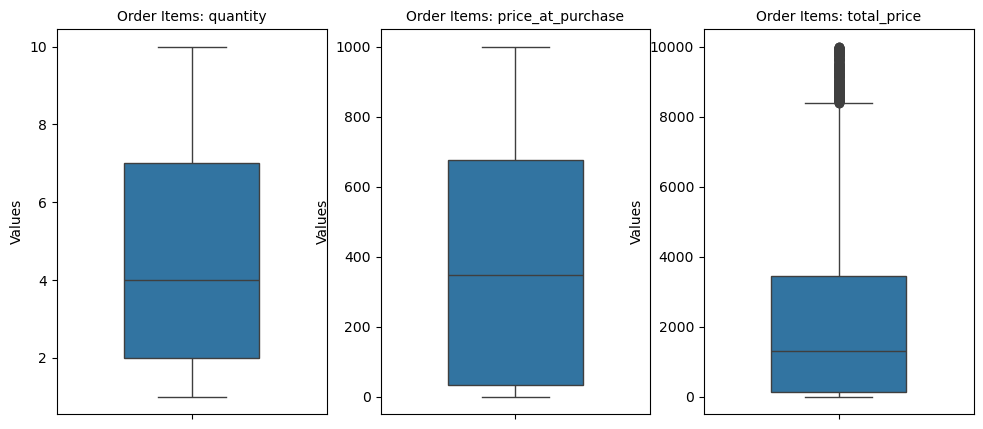

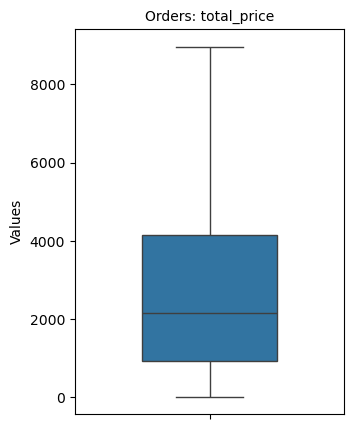

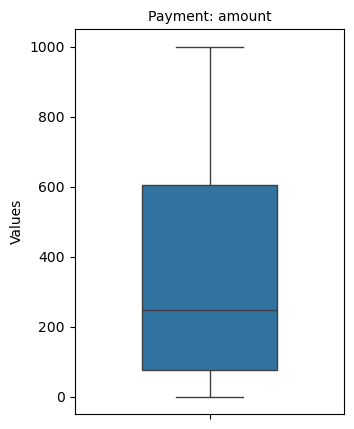

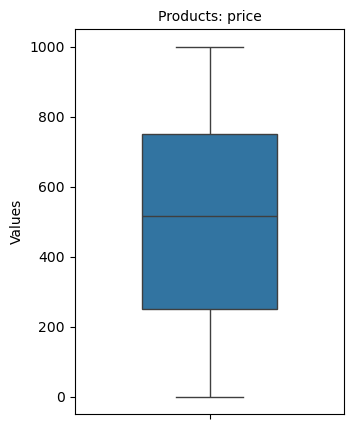

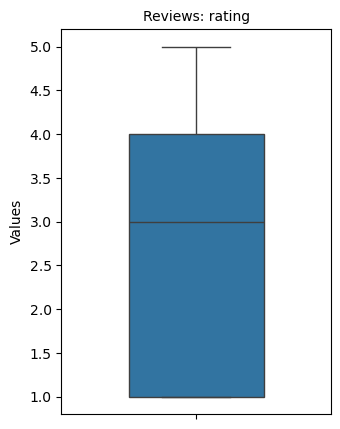

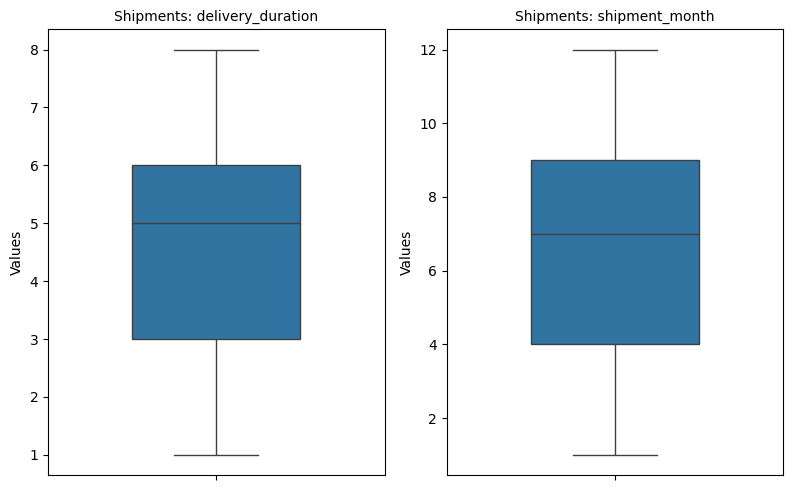

In [23]:
#Boxplots for outlier detection

# Function to create boxplots for a single table
def plot_boxplots(df, table_name, skip_columns, cols_per_row=4, box_width=0.5):
    # Filter numeric columns and exclude specified columns
    numeric_columns = [col for col in df.select_dtypes(include=['float64', 'int64']).columns if col not in skip_columns]
    
    if numeric_columns:
        rows = (len(numeric_columns) + cols_per_row - 1) // cols_per_row  # Calculate number of rows
        fig, axes = plt.subplots(rows, cols_per_row, figsize=(cols_per_row * 4, rows * 5))
        axes = axes.flatten()
        
        for i, column in enumerate(numeric_columns):
            sns.boxplot(data=df, y=column, ax=axes[i], width=box_width)
            axes[i].set_title(f'{table_name}: {column}', fontsize=10)
            axes[i].set_ylabel('Values')
            axes[i].set_xlabel('')
        
        # Hide unused subplots
        for j in range(i + 1, len(axes)):
            axes[j].set_visible(False)
       
       
    else:
        print(f"No numeric columns to plot for {table_name} after exclusions.")
#save plot       
desktop_path = os.path.expanduser("~/Desktop")

# Define columns to skip for each table
skip_columns = {
    'customers': ['customer_id', 'phone_number'],
    'order_items': ['order_item_id', 'order_id', 'product_id'],
    'orders': ['order_id', 'customer_id', 'order_day_of_week'],
    'payment': ['payment_id', 'order_id'],
    'products': ['product_id', 'supplier_id'],
    'reviews': ['review_id', 'product_id', 'customer_id'],
    'shipments': ['shipment_id', 'order_id','on_time_delivery'],
    'suppliers': ['supplier_id', 'phone_number']  
}

# Plot boxplots for each table
plot_boxplots(customers, 'Customers', skip_columns['customers'])
plot_boxplots(order_items, 'Order Items', skip_columns['order_items'])
plot_boxplots(orders, 'Orders', skip_columns['orders'])
plot_boxplots(payment, 'Payment', skip_columns['payment'])
plot_boxplots(products, 'Products', skip_columns['products'])
plot_boxplots(reviews, 'Reviews', skip_columns['reviews'])
plot_boxplots(shipments, 'Shipments', skip_columns['shipments'])
plot_boxplots(suppliers, 'Suppliers', skip_columns['suppliers'])

plt.tight_layout()

plt.show()


## Preprocessing

In [27]:
#I will retain the outliers, as they provide crucial information and valuable insights into shopping trends.

### Customers data:

In [29]:
# Customers data:

# a) Filtering data:
# Remove customers with missing essential data like customer_id 
customers = customers.dropna(subset=['customer_id'])

# b) Missing Values:
# Handling missing email and phone_number in customers.csv
# Fill missing email with a placeholder value
customers['email'] = customers['email'].fillna('unknown@example.com')

# Fill missing phone number with 'N/A'
customers['phone_number'] = customers['phone_number'].fillna('N/A')

# Ensure phone_number is of string type before applying string operations
customers['phone_number'] = customers['phone_number'].astype(str)

# Standardize phone numbers: Remove non-numeric characters
customers['phone_number'] = customers['phone_number'].str.replace(r'\D', '', regex=True)

# Fill missing first_name, last_name, and address with 'Unknown' 
customers['first_name'] = customers['first_name'].fillna('Unknown')
customers['last_name'] = customers['last_name'].fillna('Unknown')
customers['address'] = customers['address'].fillna('Unknown Address')

# Drop duplicate customers based on customer_id
customers = customers.drop_duplicates(subset=['customer_id'])

# Create full_name column
customers['full_name'] = customers['first_name'] + ' ' + customers['last_name']

# Save updated data to the same file
customers.to_csv('customers.csv', index=False)


### order_items data:

In [31]:
#order_items table
#If there are missing values for quantity, or price_at_purchase,
order_items['quantity'].fillna(1)
order_items['price_at_purchase'].fillna(order_items['price_at_purchase'].mean())

# Handling outliers for quantity and price_at_purchase using IQR
Q1_quantity = order_items['quantity'].quantile(0.25)
Q3_quantity = order_items['quantity'].quantile(0.75)
IQR_quantity = Q3_quantity - Q1_quantity
order_items = order_items[(order_items['quantity'] >= (Q1_quantity - 1.5 * IQR_quantity)) &
                          (order_items['quantity'] <= (Q3_quantity + 1.5 * IQR_quantity))]

Q1_price = order_items['price_at_purchase'].quantile(0.25)
Q3_price = order_items['price_at_purchase'].quantile(0.75)
IQR_price = Q3_price - Q1_price
order_items = order_items[(order_items['price_at_purchase'] >= (Q1_price - 1.5 * IQR_price)) &
                          (order_items['price_at_purchase'] <= (Q3_price + 1.5 * IQR_price))]

# Create total_price column
order_items['total_price'] = order_items['quantity'] * order_items['price_at_purchase']

# Save updated data to the same file
order_items.to_csv('order_items.csv', index=False)


### orders data

In [33]:
#orders table
# Fill missing values
orders['order_date'].fillna(orders['order_date'].mode()[0])
orders['total_price'].fillna(orders['total_price'].mean())
# Remove duplicates
orders.drop_duplicates(subset=['order_id'],)

# Handle outliers for total_price using IQR
Q1_price = orders['total_price'].quantile(0.25)
Q3_price = orders['total_price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
orders = orders[(orders['total_price'] >= (Q1_price - 1.5 * IQR_price)) &
                (orders['total_price'] <= (Q3_price + 1.5 * IQR_price))]


# Create new feature for the day of the week
orders['order_day_of_week'] = orders['order_date'].dt.dayofweek

# Save updated data to the same file
orders.to_csv('orders.csv', index=False)

In [35]:
#Payment table
# Fill missing payment method and transaction status
payment['payment_method'].fillna('Unknown')
payment['transaction_status'].fillna('Pending')

# Handle outliers for amount using IQR
Q1_amount = payment['amount'].quantile(0.25)
Q3_amount = payment['amount'].quantile(0.75)
IQR_amount = Q3_amount - Q1_amount
payment = payment[(payment['amount'] >= (Q1_amount - 1.5 * IQR_amount)) &
                  (payment['amount'] <= (Q3_amount + 1.5 * IQR_amount))]

# Save updated data to the same file
payment.to_csv('payment.csv', index=False)

### products data:

In [37]:
# Products Table:
# Fill missing product name, category, and price
products['product_name'].fillna('Unknown Product')
products['category'].fillna('Miscellaneous')
products['price'].fillna(products['price'].mean())


# Handle outliers for price using IQR
Q1_price = products['price'].quantile(0.25)
Q3_price = products['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
products = products[(products['price'] >= (Q1_price - 1.5 * IQR_price)) &
                    (products['price'] <= (Q3_price + 1.5 * IQR_price))]
# Save updated data to the same file
products.to_csv('products.csv', index=False)

### reviews data:

In [39]:
# review table:
# Fill missing values in the 'rating' and 'review_text' columns
reviews['rating'] = reviews['rating'].fillna(reviews['rating'].median())  # Fill missing ratings with median
reviews['review_text'] = reviews['review_text'].fillna('No review provided')  # Placeholder for missing review text

# Save the updated 'reviews' table to the same CSV file
reviews.to_csv('reviews.csv', index=False)

###  shipments data

In [41]:
#shipments table:
# Fill missing values in 'shipment_date', 'delivery_date', 'carrier', and 'shipment_status'
shipments['shipment_date'] = shipments['shipment_date'].fillna('2024-01-01')
shipments['delivery_date'] = shipments['delivery_date'].fillna('2024-01-01')
shipments['carrier'] = shipments['carrier'].fillna('Unknown')
shipments['shipment_status'] = shipments['shipment_status'].fillna('Pending')

#Handle unrealistic dates (e.g., delivery before shipment)
shipments = shipments[shipments['delivery_date'] >= shipments['shipment_date']]

# Save the updated 'shipments' table to the same CSV
shipments.to_csv('shipments.csv', index=False)

### supplier data

In [43]:

# Supplier table:

# Fill missing values in 'contact_name', 'phone_number', and 'email'
suppliers['contact_name'] = suppliers['contact_name'].fillna('Unknown')
suppliers['phone_number'] = suppliers['phone_number'].fillna('N/A')
suppliers['email'] = suppliers['email'].fillna('unknown@example.com')

# Ensure phone_number is of string type before applying string operations
suppliers['phone_number'] = suppliers['phone_number'].astype(str)

# Remove invalid phone numbers (non-numeric or of incorrect length)
# Keep only numeric characters
suppliers['phone_number'] = suppliers['phone_number'].str.replace(r'\D', '', regex=True)

# Filter out phone numbers not meeting the length criteria (e.g., 10 to 15 characters)
suppliers = suppliers[suppliers['phone_number'].apply(lambda x: len(x) >= 10 and len(x) <= 15)]

# Save the updated 'suppliers' table to the same CSV
suppliers.to_csv('suppliers.csv', index=False)


## Data Integration:

In [46]:
#Merge Orders with Customers: merge the orders dataset with customers based on customer_id to get customer details for each order.
#That is attach customer details (name, address, etc.) to each order, allowing customer-based analysis.
#(customer information per order):

order_details = pd.merge(orders, customers, on='customer_id', how='inner')

#Merge Order Items with Products:To analyze products ordered, merge order_items with products based on product_id.
#That is to attach product details (name, price, category, etc.) to each order item, allowing product-based analysis.

order_product_details = pd.merge(order_items, products, on='product_id', how='inner')

#Merge Payments with Orders: to analyze payments, we merge payment with orders on order_id. 
payment_details = pd.merge(payment, orders, on='order_id', how='inner')

#Merge Shipments with Orders:to analyze shipment data, we merge shipments with orders on order_id.
shipment_details = pd.merge(shipments, orders, on='order_id', how='inner')

#Merge Reviews with Products:to analyze reviews, merge reviews with products based on product_id.
#that is link product reviews with product information for analysis.
review_details = pd.merge(reviews, products, on='product_id', how='inner')

#Merge Suppliers with Products: to analyze supplier details associated with each product, we merge products with suppliers on supplier_id.
product_supplier_details = pd.merge(products, suppliers, on='supplier_id', how='inner')


In [48]:
#Customer Lifetime Value (CLV)
#To calculate the total amount spent by each customer across all orders.
customer_clv = order_details.groupby('customer_id')['total_price'].sum().reset_index()


In [50]:
#Calculate Order Quantity (from order_product_details)
#To calculate the total quantity ordered for each product
product_order_quantity = order_product_details.groupby('product_id')['quantity'].sum().reset_index()


In [52]:
#Product Sales Volume and Revenue
#To determine the total number of items sold and the revenue generated for each product.
#Total quantity of each product (quantity) and total revenue (total_sales = quantity * price_at_purchase).

order_product_details['total_sales'] = order_product_details['quantity'] * order_product_details['price_at_purchase']
product_sales = order_product_details.groupby('product_id')[['total_sales', 'quantity']].sum().reset_index()


In [54]:
#Customer Order Frequency
#To determine how often customers place orders.
# Count of order_id per customer_id.
customer_order_frequency = order_details.groupby('customer_id')['order_id'].count().reset_index()



In [56]:
#Calculate Average Product Rating (from review_details)
#To get an average rating for each product.
#Mean of rating for each product_id.
product_avg_rating = review_details.groupby('product_id')['rating'].mean().reset_index()


In [58]:
#Calculate Average Order Value (from order_details)
#To analyze the average spending per order.
# Mean of total_price for each order_id.
aov = order_details.groupby('order_id')['total_price'].mean().reset_index()



In [60]:
#Delivery Delay (Shipment Analysis)
#To measure how long it takes for each order to be delivered.
#Subtract shipment_date from delivery_date to calculate delivery_delay
shipment_details['delivery_delay'] = (shipment_details['delivery_date'] - shipment_details['shipment_date']).dt.days


In [62]:
#On-Time Delivery Flag
#To flag if an order was delivered on time (within 8 days from shipment).
#Binary flag for on-time delivery (1 for on-time, 0 for delayed).
shipment_details['on_time_delivery'] = (shipment_details['delivery_delay'] <= 8).astype(int)


In [64]:
#Total Revenue by Product Category
#To aggregate total revenue by product category to see which categories perform the best.
#Sum of total_sales for each category.
category_sales = order_product_details.groupby('category')['total_sales'].sum().reset_index()



In [66]:
#Product Review Count
# To count the number of reviews for each product.
# Count of review_id per product_id.
product_review_count = review_details.groupby('product_id')['review_id'].count().reset_index()


In [68]:
#Payment Method Analysis
#To find out which payment methods are most frequently used.
#Count of payment_method per order_id.
payment_method_popularity = payment_details.groupby('payment_method')['order_id'].count().reset_index()



# Analysis and Visuals:


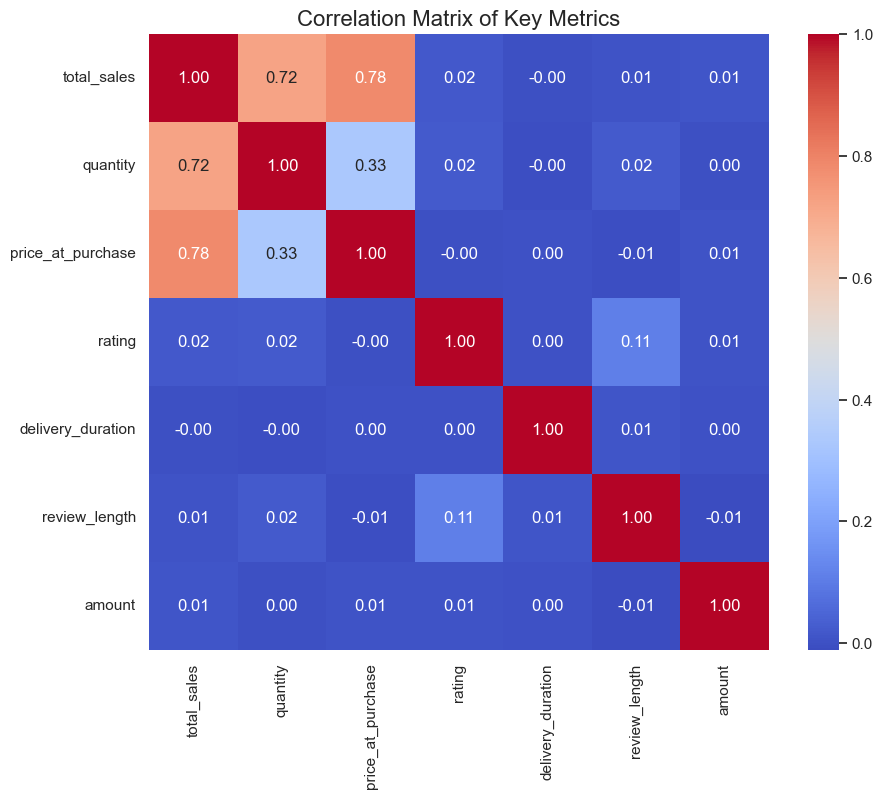

In [89]:
# Merge relevant datasets
data = order_items.merge(orders, on='order_id', how='left') \
                  .merge(products, on='product_id', how='left') \
                  .merge(reviews, on='product_id', how='left') \
                  .merge(shipments, on='order_id', how='left') \
                  .merge(payment, on='order_id', how='left')

# Feature Engineering
data['total_sales'] = data['quantity'] * data['price_at_purchase']
data['delivery_duration'] = (pd.to_datetime(data['delivery_date']) - pd.to_datetime(data['shipment_date'])).dt.days
data['review_length'] = data['review_text'].fillna('').apply(len)

# Correlation Analysis
# Select numerical columns for correlation
corr_data = data[['total_sales', 'quantity', 'price_at_purchase', 'rating', 'delivery_duration', 'review_length', 'amount']]
corr_matrix = corr_data.corr()

# Path to save the plot on desktop
desktop_path = os.path.expanduser("~/Desktop")

# Plotting Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Key Metrics', fontsize=16)

# Save the heatmap as correlation.png on desktop
correlation_path = os.path.join(desktop_path, 'correlation.png')
plt.savefig(correlation_path, bbox_inches='tight')
# show the plot:
plt.show()



## 1. Orders Analysis


Total Orders: 14839
Total Order Items: 20000


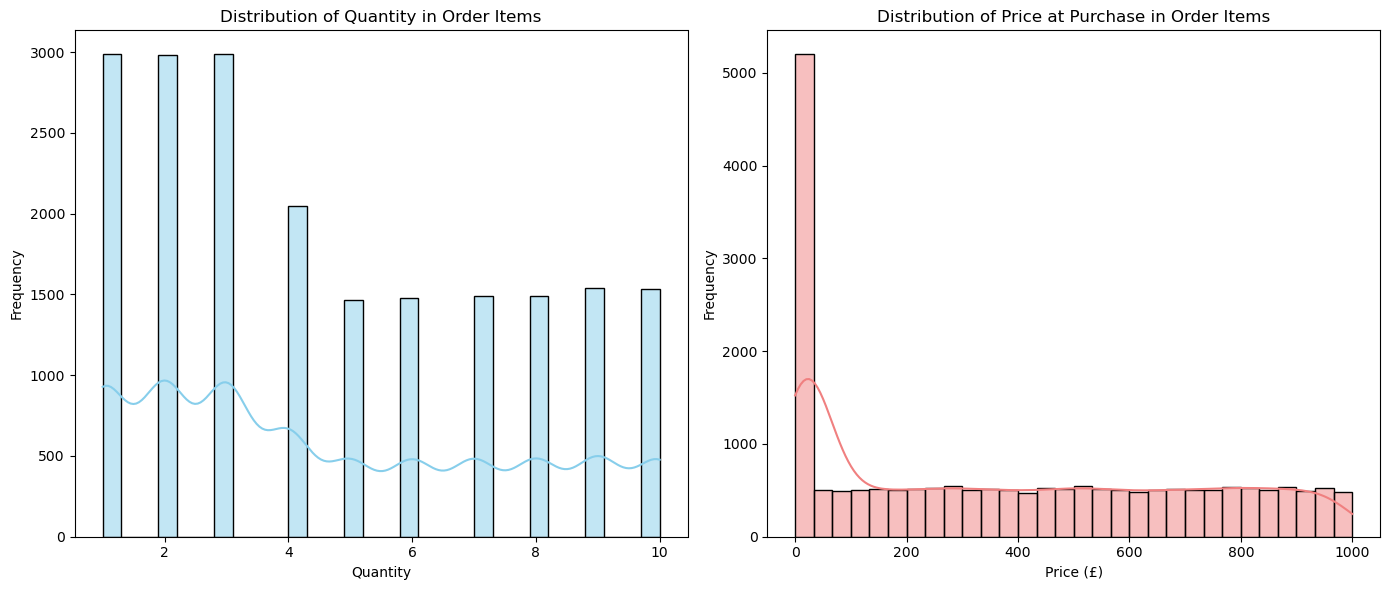

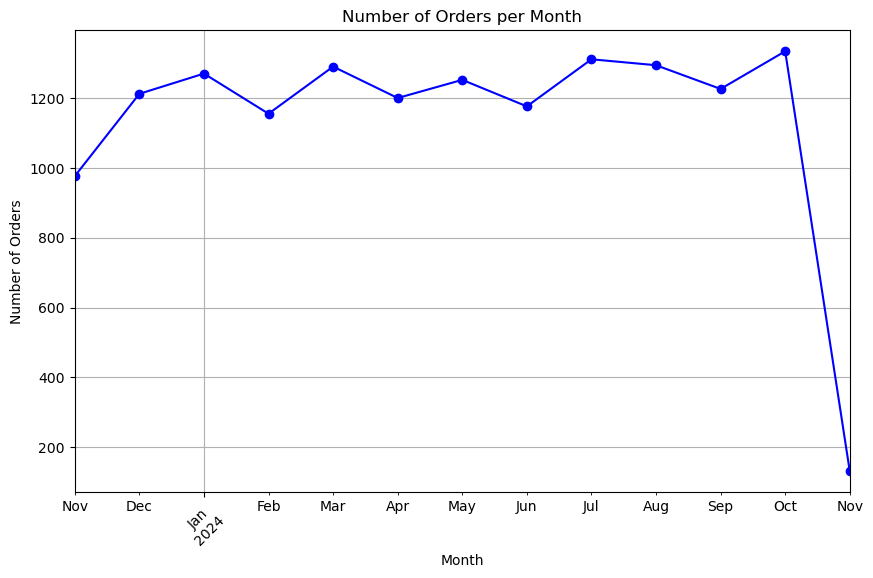

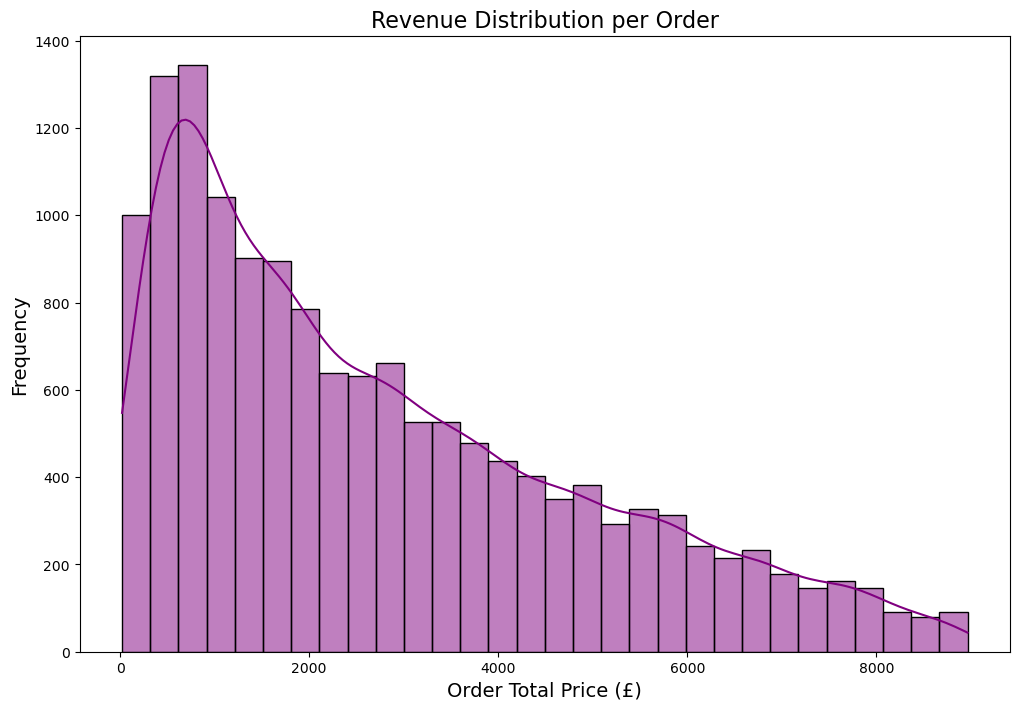

In [73]:
#order table analysis
#  Order Count vs Item Count
order_count = orders['order_id'].nunique()
order_items_count = order_items['order_item_id'].nunique()
print(f"\nTotal Orders: {order_count}")
print(f"Total Order Items: {order_items_count}")

#  Total Revenue Comparison
total_order_revenue = orders['total_price'].sum()
order_items['item_revenue'] = order_items['quantity'] * order_items['price_at_purchase']
total_item_revenue = order_items['item_revenue'].sum()

desktop_path = os.path.expanduser("~/Desktop")
# Visualization 1: Distribution of Quantity and Price at Purchase in Order Items
plt.figure(figsize=(14, 6))
# Distribution of Quantity in Order Items
plt.subplot(1, 2, 1)  # Create the first subplot in a 1x2 grid

sns.histplot(order_items['quantity'], kde=True, color='skyblue', bins=30) # Plot histogram for 'quantity'
plt.title('Distribution of Quantity in Order Items')  # Add a title to the plot
plt.xlabel('Quantity')  # Label for the x-axis
plt.ylabel('Frequency') # Label for the y-axis



#Distribution of Price at Purchase in Order Items:
plt.subplot(1, 2, 2) # Create the second subplot in a 1x2 grid

sns.histplot(order_items['price_at_purchase'], kde=True, color='lightcoral', bins=30)
plt.title('Distribution of Price at Purchase in Order Items')
plt.xlabel('Price (£)')
plt.ylabel('Frequency')
quantity_price_path = os.path.join(desktop_path, 'quantity_price_distribution.png')  # Path to save the plot
plt.savefig(quantity_price_path, bbox_inches='tight') # Save the plot with tight layout 
plt.tight_layout()    
plt.show()


# Visualization 2: Time-based Analysis: Number of Orders per Month
# Convert 'order_date' to datetime 
orders['order_date'] = pd.to_datetime(orders['order_date'])
# Count number of orders per month
orders_by_month = orders.groupby(orders['order_date'].dt.to_period('M')).size()

# Plot
plt.figure(figsize=(10, 6))
orders_by_month.plot(kind='line', color='blue', marker='o')
plt.title('Number of Orders per Month')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
quantity_price_path = os.path.join(desktop_path, 'orders_per_month.png')  # Path to save the plot
plt.savefig(quantity_price_path, bbox_inches='tight')
plt.grid(True)
plt.show()



# 3.. Revenue Distribution by Order
plt.figure(figsize=(12, 8))
sns.histplot(orders['total_price'], kde=True, bins=30, color='purple')
plt.title('Revenue Distribution per Order', fontsize=16)
plt.xlabel('Order Total Price (£)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()



## 2. Customer Purchase Trends

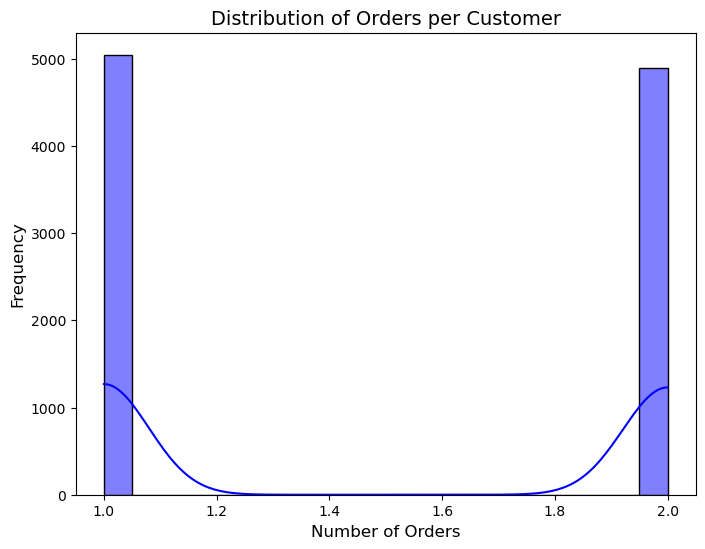

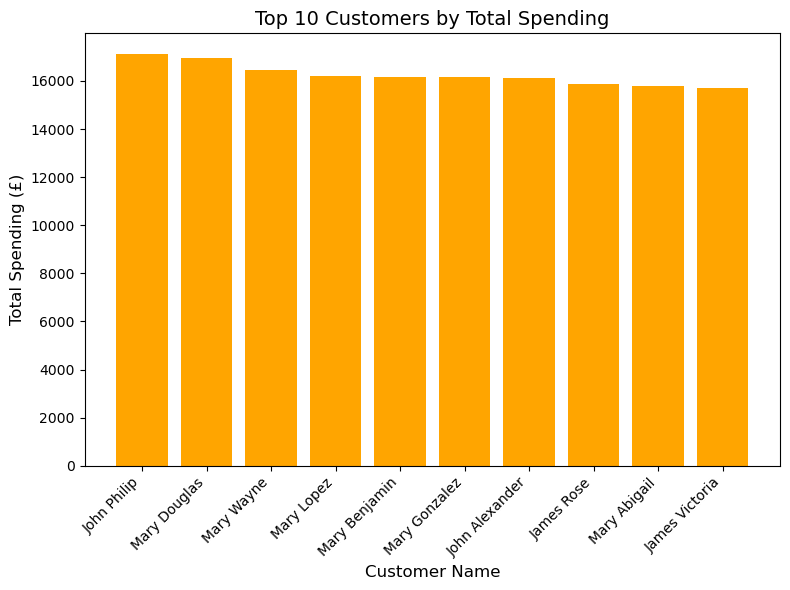

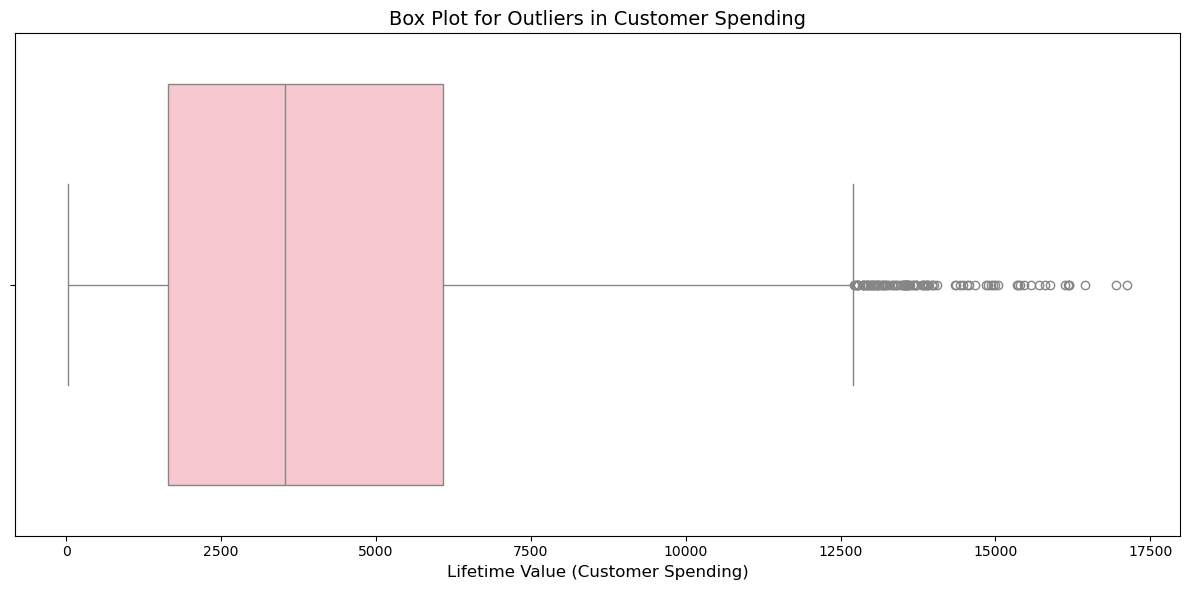

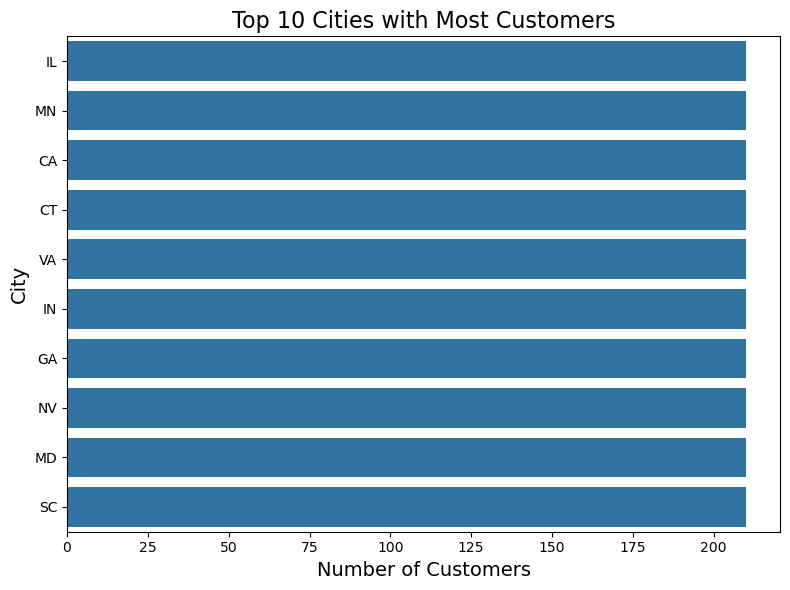

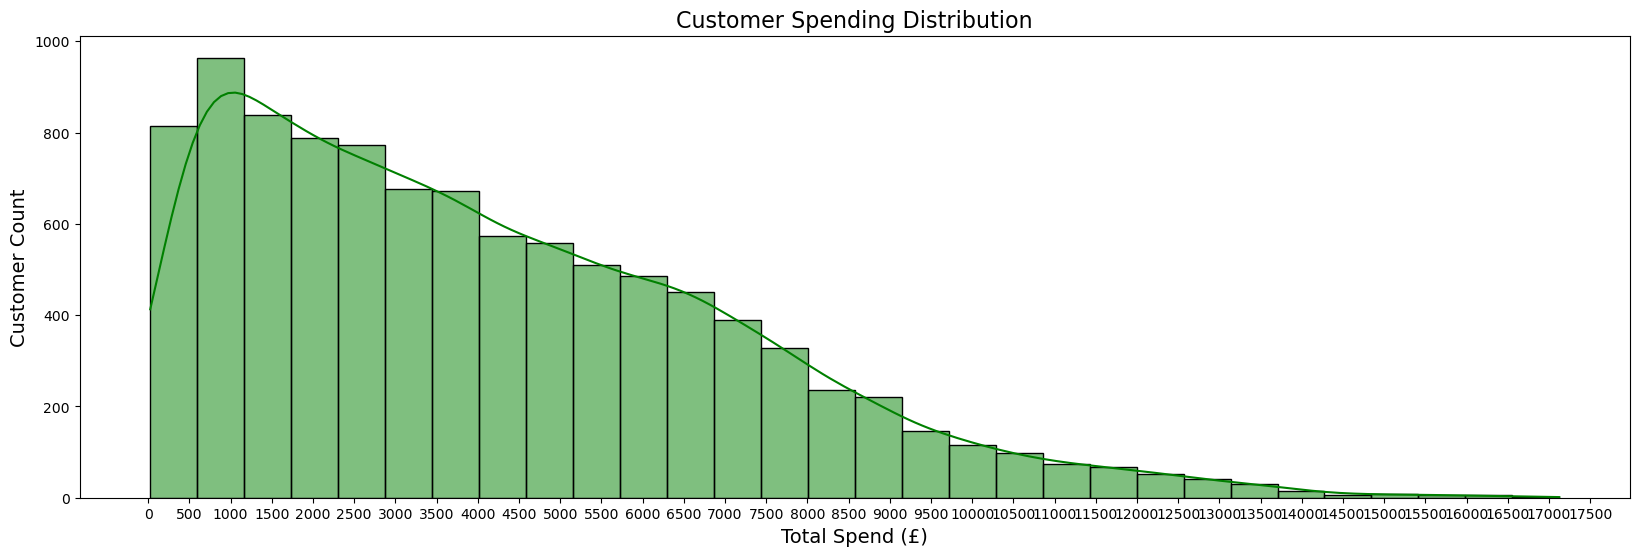

NameError: name 'repeat_customers' is not defined

<Figure size 800x600 with 0 Axes>

In [75]:

#Objective: Understand customer purchase behavior by analyzing order frequency, spending patterns, and customer segmentation.

# Orders per Customer: 
customer_orders = orders.groupby('customer_id').agg(
    total_orders=('order_id', 'count'),
    total_spent=('total_price', 'sum')
).reset_index()

# Merge with Customer Data
customer_analysis = customer_orders.merge(customers, on='customer_id')

# Visualization 1: Distribution of Order Count: Histogram showing the distribution of the number of orders per customer.
plt.figure(figsize=(8,6))
sns.histplot(customer_orders['total_orders'], bins=20, kde=True, color='blue')
plt.title('Distribution of Orders per Customer', fontsize=14)
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


# Visualization 2: Top 10 Customers by Total Spending: Bar chart of the highest spenders.

top_10_customers = customer_analysis.sort_values('total_spent', ascending=False).head(10)
plt.figure(figsize=(8, 6))
plt.bar(top_10_customers['first_name'] + ' ' + top_10_customers['last_name'], top_10_customers['total_spent'], color='orange')
plt.title('Top 10 Customers by Total Spending', fontsize=14)
plt.xlabel('Customer Name', fontsize=12)
plt.ylabel('Total Spending (£)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()





#Visualization 3:Creating a box plot to visualize customer spending outliers.
# Identify outliers in customer spending, which could indicate high-value customers or potential fraud.
plt.figure(figsize=(12, 6))
sns.boxplot(x=customer_clv['total_price'], color='pink')
plt.title('Box Plot for Outliers in Customer Spending', fontsize=14)
plt.xlabel('Lifetime Value (Customer Spending)', fontsize=12)
plt.tight_layout()
plt.show()

# The box plot shows the distribution of customer spending and highlights any outliers (e.g., very high spenders).



#Visualization 4: Geographical Distribution of Customers: A heatmap or count plot of customers by city or region.
customers['city'] = customers['address'].str.extract(r'(\w+\s?\w+)$')  # Extract city for simplicity
city_counts = customers['city'].value_counts().head(10)

# Save path for the  desktop
desktop_path = os.path.expanduser("~/Desktop")
city_path = os.path.join(desktop_path, 'city.png')

# Bar plot
plt.figure(figsize=(8, 6))
sns.barplot(y=city_counts.index, x=city_counts.values)
plt.title('Top 10 Cities with Most Customers', fontsize=16)
plt.xlabel('Number of Customers', fontsize=14)
plt.ylabel('City', fontsize=14)
plt.tight_layout()

# Save the plot
plt.savefig(city_path, bbox_inches='tight')
plt.show()



#Visualization 5: Customer Segments Based on Total Spend: total spend by customer to segment into low, medium, and high spenders.
# Calculate total spend by customer
customer_spend = orders.groupby('customer_id')['total_price'].sum().reset_index()
# Plot the histogram
plt.figure(figsize=(20, 6))
sns.histplot(customer_spend['total_price'], kde=True, bins=30, color='green')
plt.title('Customer Spending Distribution', fontsize=16)
plt.xlabel('Total Spend (£)', fontsize=14)
plt.ylabel('Customer Count', fontsize=14)

# Customize the x-axis labels
max_spend = customer_spend['total_price'].max()
xticks = range(0, int(max_spend) + 500, 500)
plt.xticks(xticks)

plt.show()


#Visualization 6: Calculate the number of orders and total spend per customer
customer_orders = orders.groupby('customer_id').agg(
    total_spend=('total_price', 'sum'),
    order_count=('order_id', 'count')
).reset_index()


# Plot the total spend vs order count for repeat customers
plt.figure(figsize=(8, 6))
sns.scatterplot(x='order_count', y='total_spend', data=repeat_customers)
plt.title('Repeat Customers: Total Spend vs. Number of Orders')
plt.xlabel('Number of Orders')
plt.ylabel('Total Spend')
plt.show() 


#Visualization 7:A boxplot to visualize the distribution of average cart values across the different customer segments.
#Customers are grouped into low, medium, and high spenders based on their average cart value.
# Merge order_items with orders to get the customer_id
merged_data = order_items.merge(orders[['customer_id', 'order_id']], on='order_id', how='left')

# Calculate average cart value (ACV) per customer
merged_data['acv'] = merged_data.groupby('order_id')['total_price'].transform('sum')
customer_acv = merged_data.groupby('customer_id')['acv'].mean().reset_index()

# Segment customers into low, medium, and high spenders
bins = [0, 50, 150, float('inf')]
labels = ['Low', 'Medium', 'High']
customer_acv['spending_segment'] = pd.cut(customer_acv['acv'], bins=bins, labels=labels)

# Plot the average cart value by customer segment
plt.figure(figsize=(8, 6))  
sns.boxplot(x='spending_segment', y='acv', data=customer_acv)  
plt.title('Average Cart Value by Customer Segment')
plt.xlabel('Spending Segment')
plt.ylabel('Average Cart Value')
plt.show()


#Visualization 8: Top 10 customers based on quantity purchased:

# Merge with customers table to get first_name and last_name
merged_data = pd.merge(merged_data, customers[['customer_id', 'first_name', 'last_name']], on='customer_id', how='inner')

# Create a full_name column by combining first_name and last_name
merged_data['full_name'] = merged_data['first_name'] + ' ' + merged_data['last_name']
# Now, group by customer_id and full_name and sum the quantity
customer_segment = merged_data.groupby(['full_name'])['quantity'].sum().reset_index()

# Sort by quantity in descending order and select the top 10 customers
top_customers = customer_segment.sort_values(by='quantity', ascending=False).head(10)
# Plotting customer segmentation for the top 10 customers based on total quantity purchased
plt.figure(figsize=(8, 6))
sns.barplot(x='quantity', y='full_name', data=top_customers, palette='viridis', hue='quantity')
plt.title('Top 10 Customers Based on Total Quantity Purchased')
plt.xlabel('Total Quantity Purchased')
plt.ylabel('Customer Full Name')
plt.show()



#Visualization 9:distribution of Customer Lifetime Value (CLV)
plt.figure(figsize=(20, 8))
# Calculate the range of CLV and create bins with intervals of 200
bin_edges = range(0, int(customer_clv['total_price'].max()) + 200, 200)

plt.hist(customer_clv['total_price'], bins=bin_edges, color='skyblue', edgecolor='black')
plt.title('Distribution of Customer Lifetime Value (CLV)', fontsize=14)
plt.xlabel('Lifetime Value (in ranges of 200)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(bin_edges, rotation=45)  # Rotate x-axis labels for clarity
plt.tight_layout()
plt.show()





## 3.Product Analysis

In [ ]:

#Objective: Identify top-performing products by revenue, popularity, and customer feedback.

# Product-Level Analysis:
# Ensure columns are numeric
order_items['quantity'] = pd.to_numeric(order_items['quantity'], errors='coerce')
products['price'] = pd.to_numeric(products['price'], errors='coerce')

# Merge order_items with products to include product_name, price, and category
order_details = order_items.merge(products[['product_id', 'product_name', 'price', 'category']], 
                                  on='product_id', how='left')


# Calculate total revenue per product
order_details['revenue'] = order_details['quantity'] * order_details['price']

# Calculate total quantity and total revenue per product
product_sales = order_details.groupby('product_name').agg(
    total_quantity=('quantity', 'sum'),
    total_revenue=('revenue', 'sum')  # Sum the revenue directly
).reset_index()

# Check the result
print(product_sales.head())


# Visualization 1: Top 10 Products by Revenue: Bar chart of products contributing the most revenue.
top_10_products = product_sales.sort_values(by='total_revenue', ascending=False).head(10)
#save to desktop
desktop_path = os.path.expanduser("~/Desktop")
top_products_path = os.path.join(desktop_path, 'top_10_products_by_revenue.png')

plt.figure(figsize=(10, 6))
plt.bar(top_10_products['product_name'], top_10_products['total_revenue'], color='purple')
plt.title('Top 10 Products by Revenue', fontsize=16)
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Revenue (£)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(top_products_path, bbox_inches='tight')
plt.show()






# Visualization 2:  Top 10 Most Expensive Products Visualization
top_expensive_products = products.sort_values('price', ascending=False).head(10)
plt.figure(figsize=(6, 6))
sns.barplot(x='price', y='product_name', data=top_expensive_products, palette='viridis',hue='price')
# Title and Labels
plt.title('Top 10 Most Expensive Products by Price', fontsize=16)
plt.xlabel('Price (£)', fontsize=14)
plt.ylabel('Product Name', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


# Visualization 3:Product Count by Category:
#Find out how many products exist within each category.
category_count = products['category'].value_counts()
plt.figure(figsize=(6, 5))
sns.barplot(x=category_count.index, y=category_count.values)
plt.title('Product Count by Category')
plt.xlabel('Category')
plt.ylabel('Number of Products in the category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



# Visualization 4: Product Category Revenue Share Distribution: 
#Pie chart to understand the share of each category.

# Merge order_items with products to include category and price
order_details = order_items.merge(products[['product_id', 'category', 'price']], 
                                  on='product_id', how='left')
# Calculate revenue per product
order_details['revenue'] = order_details['quantity'] * order_details['price']

# Group by category and sum the total revenue
category_revenue = order_details.groupby('category').agg(
    total_revenue=('revenue', 'sum')
).reset_index()
# Plot the pie chart
plt.figure(figsize=(7, 7))
plt.pie(category_revenue['total_revenue'], labels=category_revenue['category'], autopct='%1.1f%%', 
        colors=sns.color_palette('Set3'), startangle=140)
plt.title('Product Category Revenue Share Distribution', fontsize=14)
plt.show()





# Visualization 5: Average quantity sold by product category

# Merge order_items with products to include category information
order_items_products = pd.merge(order_items, products[['product_id', 'category']], on='product_id', how='left')

# Calculate the average quantity sold by product category
avg_quantity_by_category = order_items_products.groupby('category')['quantity'].mean().reset_index()

# Plotting the average quantity sold by product category
plt.figure(figsize=(6, 6))
sns.barplot(x='category', y='quantity', data=avg_quantity_by_category, palette='viridis',hue='quantity')
plt.title('Average Quantity Sold by Product Category', fontsize=16)
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Average Quantity Sold', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Visualization 6: Product popularity by Month

# Convert 'order_date' to datetime format in orders dataframe
orders['order_date'] = pd.to_datetime(orders['order_date'])
# Extract month from 'order_date'
orders['month'] = orders['order_date'].dt.month
# Merge 'order_items' with 'products' to bring in 'category' column
order_items_products = order_items.merge(products[['product_id', 'category']], on='product_id', how='left')
# Merge the above result with 'orders' to add the 'month' column
product_sales_by_month = order_items_products.merge(orders[['order_id', 'month']], on='order_id', how='left')
# Check if the 'month' and 'category' columns are present
print(product_sales_by_month[['order_id', 'month', 'category']].head())
# Group by 'month' and 'category', summing the 'quantity'
category_sales = product_sales_by_month.groupby(['month', 'category'])['quantity'].sum().unstack().fillna(0)

desktop_path = os.path.expanduser("~/Desktop")
prod_by_month_path = os.path.join(desktop_path, 'product_category_popularity_by_month.png')

# Plot the stacked area chart
sns.set_style('whitegrid')
colors = sns.color_palette("Set2", n_colors=len(category_sales.columns))  
plt.figure(figsize=(14, 8))
category_sales.plot(kind='area', stacked=True, color=colors, alpha=0.8)
plt.title('Product Category Popularity by Month', fontsize=16, weight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Quantity Sold', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels to avoid overlap
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig(prod_by_month_path, bbox_inches='tight')
plt.show()



# Visualization 7:Price Distribution by Category:
#A boxplot showing the price distribution within each product category.plt.figure(figsize=(12, 8))
sns.boxplot(x='category', y='price', data=products)
plt.title('Price Distribution by Category')
plt.xlabel('Product Category')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()








## 4. Review and Rating Analysis:

In [ ]:

# Visualization 1: Relationship Between Average Rating and Purchase Quantities

# Merge reviews and order_items to analyze purchases and ratings
product_review_purchase = reviews.merge(order_items[['product_id', 'quantity']], on='product_id', how='inner')

# Group by product to calculate average rating and total quantity purchased
product_review_purchase_summary = product_review_purchase.groupby('product_id').agg(
    avg_rating=('rating', 'mean'),
    total_quantity=('quantity', 'sum')
).reset_index()

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(product_review_purchase_summary['avg_rating'], product_review_purchase_summary['total_quantity'], 
            alpha=0.7, color='blue')
plt.title('Relationship Between Average Rating and Purchase Quantities', fontsize=14)
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Total Quantity Purchased', fontsize=12)
plt.grid(True)
plt.tight_layout()
# Save the plot
plt.savefig(rating_path, bbox_inches='tight')
plt.show()



# Visualization 2: Top 5 Products with Most Reviews and Bottom 4 Products with Least Reviews

# Grouping by product name to count reviews
product_review_count = review_details.groupby('product_name')['review_id'].count().reset_index()
# Sorting the products by review count in descending order to get the top 5
top_5_reviewed_products = product_review_count.sort_values(by='review_id', ascending=False).head(5)
# Sorting the products by review count in ascending order to get the bottom 4
bottom_4_reviewed_products = product_review_count.sort_values(by='review_id', ascending=True).head(4)
# Combine top 5 and bottom 4 products into one DataFrame for plotting
combined_reviewed_products = pd.concat([top_5_reviewed_products, bottom_4_reviewed_products])
# Assign colors for top 5 and bottom 4 products
combined_reviewed_products['color'] = ['salmon'] * len(top_5_reviewed_products) + ['lightblue'] * len(bottom_4_reviewed_products)

plt.figure(figsize=(12, 6))
bars = plt.bar(combined_reviewed_products['product_name'], combined_reviewed_products['review_id'], color=combined_reviewed_products['color'])
plt.title('Top 5 Products with Most Reviews and Bottom 4 Products with Least Reviews', fontsize=14)
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()





# Visualization 3: Sales and Ratings by Product Category
# Group by category to calculate total sales and average rating
category_sales = data.groupby('category').agg(
    total_sales=('total_sales', 'sum'),
    avg_rating=('rating', 'mean'),
    total_products=('product_id', 'nunique')
).reset_index()

# Visualization 4: Sales and Ratings by Category
fig, ax1 = plt.subplots(figsize=(12, 6))
sns.barplot(x='category', y='total_sales', data=category_sales, ax=ax1, color='skyblue')
ax1.set_ylabel('Total Sales (£)', color='blue')
ax1.set_xlabel('Product Category')
ax1.tick_params(axis='y', labelcolor='blue')
plt.xticks(rotation=45)

ax2 = ax1.twinx()
sns.lineplot(x='category', y='avg_rating', data=category_sales, ax=ax2, color='green', marker='o')
ax2.set_ylabel('Average Rating', color='green')
ax2.tick_params(axis='y', labelcolor='green')

plt.title('Sales and Ratings by Product Category', fontsize=14)
plt.tight_layout()
plt.show()



# Visualization 5:Top 10 and Bottom 5 Products by Average Rating
# Calculate the average rating for each product
product_avg_rating = reviews.groupby('product_id').agg(
    average_rating=('rating', 'mean')
).reset_index()
# Merge with products to include product_name
product_avg_rating = product_avg_rating.merge(products[['product_id', 'product_name']], on='product_id', how='left')
# Top 10 Products by Average Rating
top_rated_products = product_avg_rating.sort_values(by='average_rating', ascending=False).head(10)
# Bottom 5 Products by Average Rating
least_rated_products = product_avg_rating.sort_values(by='average_rating', ascending=True).head(5)
# Combine top and bottom products into one DataFrame for plotting
combined_products = pd.concat([top_rated_products, least_rated_products])

combined_products['color'] = ['pink'] * len(top_rated_products) + ['lightblue'] * len(least_rated_products)

plt.figure(figsize=(12, 6))
bars = plt.bar(combined_products['product_name'], combined_products['average_rating'], color=combined_products['color'])
plt.title('Top 10 and Bottom 5 Products by Average Rating', fontsize=14)
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 5)  # Assuming ratings are on a 0-5 scale
plt.tight_layout()
plt.show()




# Visualization 6: Relationship Between Review Count and Purchase Quantities
# Merge reviews and order_items to analyze purchases and review counts
product_review_count = reviews.groupby('product_id')['review_id'].count().reset_index(name='review_count')
product_purchase_data = product_review_count.merge(order_items[['product_id', 'quantity']], on='product_id', how='inner')

# Group by product to calculate review count and total quantity purchased
product_review_purchase_summary = product_purchase_data.groupby('product_id').agg(
    review_count=('review_count', 'sum'),
    total_quantity=('quantity', 'sum')
).reset_index()
desktop_path = os.path.expanduser("~/Desktop")
rating_path = os.path.join(desktop_path, 'rating.png')
plt.figure(figsize=(10, 6))
plt.scatter(product_review_purchase_summary['review_count'], product_review_purchase_summary['total_quantity'], alpha=0.7, color='orange')
plt.title('Relationship Between Review Count and Purchase Quantities', fontsize=14)
plt.xlabel('Review Count', fontsize=12)
plt.ylabel('Total Quantity Purchased', fontsize=12)
plt.grid(True)
plt.tight_layout()
# Save the plot
plt.savefig(rating_path, bbox_inches='tight')
plt.show()







# Visualization 7:
#Reviews and Ratings Over Time:
# Convert review_date to datetime
reviews['review_date'] = pd.to_datetime(reviews['review_date'])
# Group by month-year to count reviews and calculate average rating
reviews['review_month'] = reviews['review_date'].dt.to_period('M')
reviews_over_time = reviews.groupby('review_month').agg(
    review_count=('review_id', 'count'),
    avg_rating=('rating', 'mean')
).reset_index()
# Line plot for reviews and ratings over time
fig, ax1 = plt.subplots(figsize=(12, 6))
color = 'tab:blue'
ax1.set_xlabel('Month-Year', fontsize=12)
ax1.set_ylabel('Review Count', color=color, fontsize=12)
ax1.plot(reviews_over_time['review_month'].astype(str), reviews_over_time['review_count'], color=color, marker='o', label='Review Count')
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=45, ha='right')
ax2 = ax1.twinx()  # instantiate a second y-axis
color = 'tab:orange'
ax2.set_ylabel('Average Rating', color=color, fontsize=12)
ax2.plot(reviews_over_time['review_month'].astype(str), reviews_over_time['avg_rating'], color=color, marker='x', label='Average Rating')
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
plt.title('Reviews and Ratings Over Time', fontsize=14)
plt.show()




# Visualization 8:Top 5 and Bottom 2 Suppliers by Average Rating
# Merge reviews with products to include supplier information
supplier_reviews = reviews.merge(products[['product_id', 'supplier_id']], on='product_id')
supplier_reviews = supplier_reviews.merge(suppliers[['supplier_id', 'supplier_name']], on='supplier_id')
# Calculate average rating per supplier
supplier_avg_rating = supplier_reviews.groupby('supplier_name')['rating'].mean().reset_index(name='avg_rating')
# Top 5 Suppliers by Customer Satisfaction (Average Rating)
top_5_rated_suppliers = supplier_avg_rating.sort_values(by='avg_rating', ascending=False).head(5)
# Bottom 2 Suppliers by Customer Satisfaction (Average Rating)
bottom_2_rated_suppliers = supplier_avg_rating.sort_values(by='avg_rating').head(2)
# Combine top 5 and bottom 2 for a combined visualization
combined_suppliers = pd.concat([top_5_rated_suppliers, bottom_2_rated_suppliers])
combined_suppliers['color'] = ['green'] * len(top_5_rated_suppliers) + ['red'] * len(bottom_2_rated_suppliers)

plt.figure(figsize=(10, 6))
plt.bar(combined_suppliers['supplier_name'], combined_suppliers['avg_rating'], color=combined_suppliers['color'])
plt.title('Top 5 and Bottom 2 Suppliers by Average Rating', fontsize=14)
plt.xlabel('Supplier Name', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



## 4. Supplier analysis

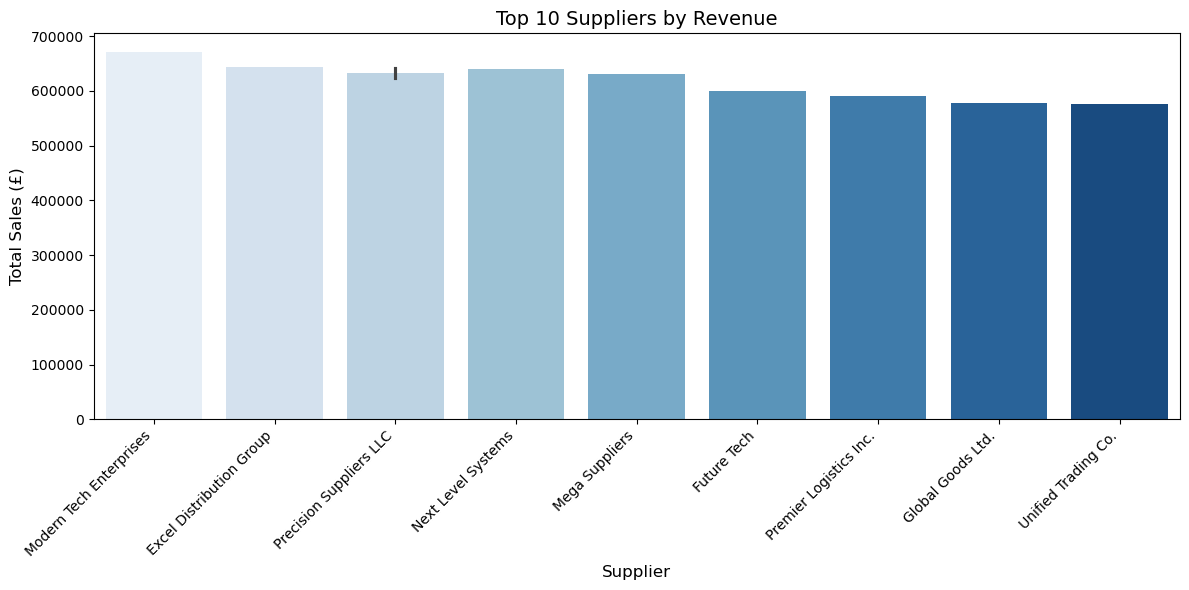

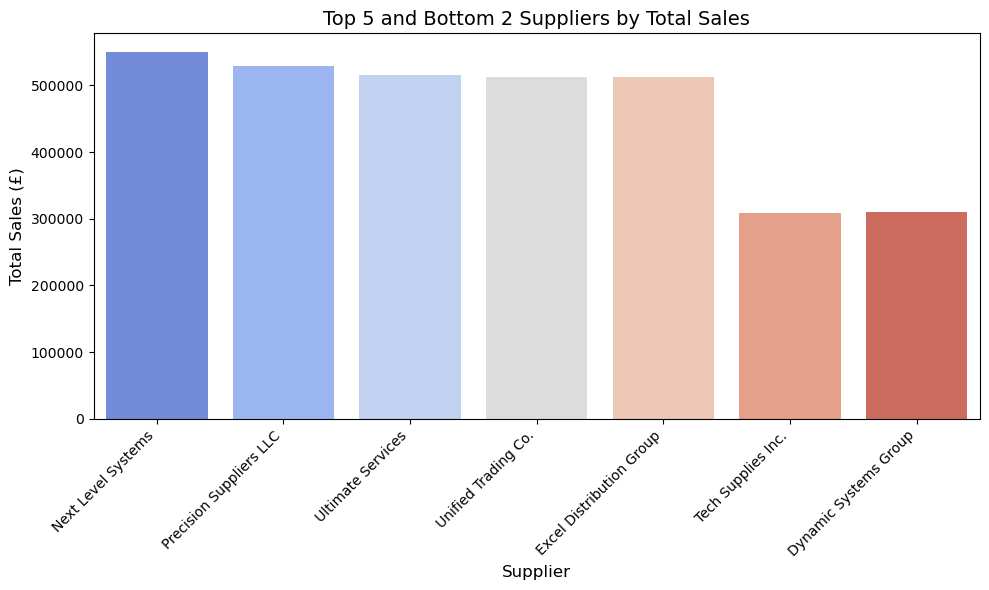

In [79]:

#Visualization 1:Top 10 Suppliers by Revenue
# Merge 'order_items' with 'products' to get the 'product_name', 'price', and 'supplier_id'
product_sales = pd.merge(order_items, products[['product_id', 'product_name', 'price', 'supplier_id']], on='product_id', how='left', suffixes=('_order', '_product'))

# Calculate total sales by multiplying quantity and price
product_sales['total_sales'] = product_sales['quantity'] * product_sales['price']

#  group by 'supplier_id' and sum 'total_sales'
supplier_sales = product_sales.groupby('supplier_id')[['total_sales']].sum().reset_index()

# Merge with 'suppliers' to get supplier names
supplier_sales = pd.merge(supplier_sales, suppliers[['supplier_id', 'supplier_name']], on='supplier_id', how='left')

# Sorting and plotting the top 10 suppliers by total sales
top_10_suppliers = supplier_sales.sort_values(by='total_sales', ascending=False).head(10)

# Plotting the top 10 suppliers by revenue
plt.figure(figsize=(12, 6))
sns.barplot(x='supplier_name', y='total_sales', data=top_10_suppliers, palette='Blues',hue='supplier_name')
plt.title('Top 10 Suppliers by Revenue', fontsize=14)
plt.xlabel('Supplier', fontsize=12)
plt.ylabel('Total Sales (£)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



# Visualization 2:Top 5 and Bottom 2 Suppliers by Total Sales
# Merge 'products' with 'order_items' to get relevant information for total sales calculation
supplier_sales = products.merge(order_items, on='product_id')
# Calculate total sales for each item (quantity * price)
supplier_sales['total_sales'] = supplier_sales['quantity'] * supplier_sales['price_at_purchase']
# Calculate total number of products and total sales per supplier
supplier_sales_summary = supplier_sales.groupby('supplier_id').agg(
    total_products=('product_id', 'nunique'),
    total_sales=('total_sales', 'sum')
).reset_index()
# Merge with 'suppliers' 
supplier_sales_summary = supplier_sales_summary.merge(suppliers, on='supplier_id')
# Sorting and selecting the top 5 suppliers by total sales
top_5_suppliers_by_sales = supplier_sales_summary.sort_values(by='total_sales', ascending=False).head(5)
# Sorting and selecting the bottom 2 suppliers by total sales
bottom_2_suppliers_by_sales = supplier_sales_summary.sort_values(by='total_sales', ascending=True).head(2)
# Combine the top 5 and bottom 2 into one dataframe
combined_suppliers = pd.concat([top_5_suppliers_by_sales[['supplier_name', 'total_sales']], 
                                bottom_2_suppliers_by_sales[['supplier_name', 'total_sales']]])
# Plotting the combined data
plt.figure(figsize=(10, 6))
sns.barplot(x='supplier_name', y='total_sales', data=combined_suppliers, palette='coolwarm',hue='supplier_name' ,legend=False )

plt.title('Top 5 and Bottom 2 Suppliers by Total Sales', fontsize=14)
plt.xlabel('Supplier', fontsize=12)
plt.ylabel('Total Sales (£)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Shipment Analysis

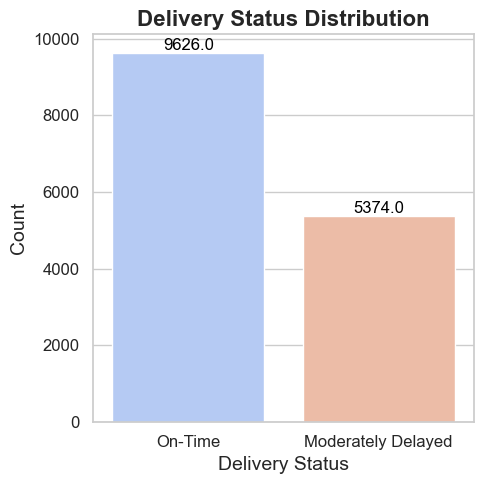

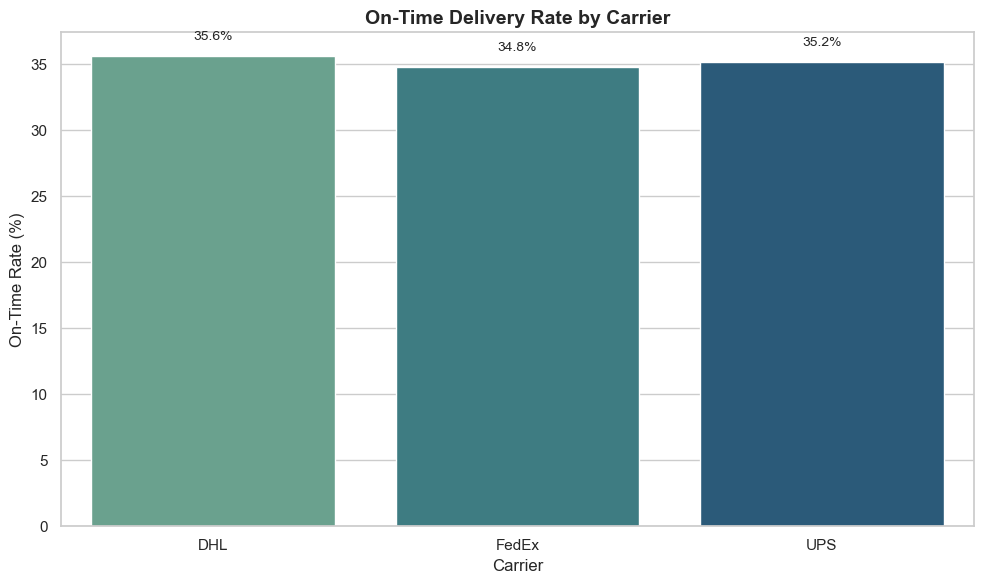

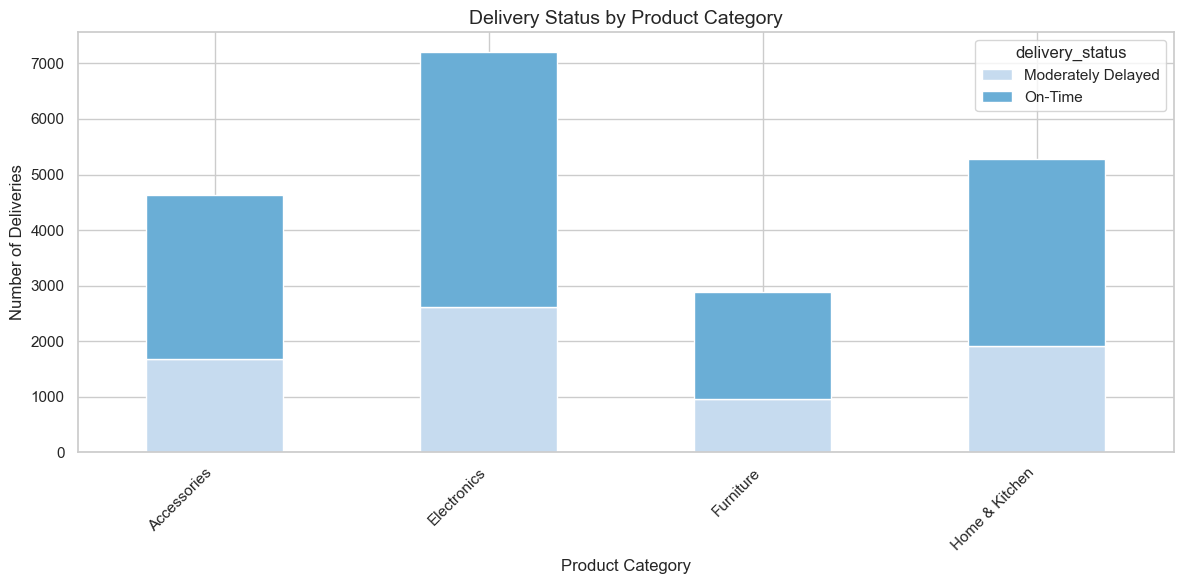

In [82]:

# 1. Classifying Delivery Delays
# Set a consistent style
sns.set_theme(style="whitegrid")

# Convert 'shipment_date' and 'delivery_date' to datetime format
shipments['shipment_date'] = pd.to_datetime(shipments['shipment_date'], errors='coerce')
shipments['delivery_date'] = pd.to_datetime(shipments['delivery_date'], errors='coerce')

# Calculate delivery duration and determine if it's on time (e.g., delivered within 3 days)
shipments['delivery_duration'] = (shipments['delivery_date'] - shipments['shipment_date']).dt.days
shipments['on_time'] = shipments['delivery_duration'] <= 3  # Adjust this threshold as needed

# Extract month and year from shipment_date to group by month
shipments['shipment_month'] = shipments['shipment_date'].dt.to_period('M')

# Group by shipment_month and calculate the on-time delivery rate
monthly_delivery = shipments.groupby('shipment_month').agg(
    on_time_rate=('on_time', 'mean')  # The mean of 'on_time' will give the proportion of on-time deliveries
).reset_index()

# Convert the on-time rate to percentage
monthly_delivery['on_time_rate'] = monthly_delivery['on_time_rate'] * 100

# Group by carrier and calculate the on-time delivery rate
carrier_performance = shipments.groupby('carrier').agg(
    total_shipments=('shipment_id', 'count'),
    on_time_count=('on_time', 'sum')
).reset_index()
carrier_performance['on_time_rate'] = (carrier_performance['on_time_count'] / carrier_performance['total_shipments']) * 100

# Merge 'shipments', 'order_items', and 'products' to include relevant columns
product_shipments = pd.merge(shipments, order_items, on='order_id', how='left').merge(products, on='product_id', how='left')

# Group by product category to calculate metrics
product_delay = product_shipments.groupby('category').agg(
    avg_delivery_duration=('delivery_duration', 'mean'),
    on_time_rate=('on_time', 'mean')  # This calculates the proportion of on-time deliveries
).reset_index()

# Convert the on-time rate to a percentage
product_delay['on_time_rate'] = product_delay['on_time_rate'] * 100

# Plot Delivery Status Distribution 
plt.figure(figsize=(5, 5))
ax = sns.countplot(x='delivery_status', data=shipments, palette='coolwarm', hue='delivery_status', legend=False)

ax.set_title('Delivery Status Distribution', fontsize=16, fontweight='bold')
ax.set_xlabel('Delivery Status', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

# Add numeric labels on top of each bar
for bar in ax.patches:
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # x-coordinate
        bar.get_height() + 2,  # y-coordinate
        f'{bar.get_height()}',  # label text
        ha='center', va='bottom', fontsize=12, color='black' )

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()





# 2. Aggregated Metrics by Carrier: On-Time Delivery Rate by Carrier
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='carrier',  y='on_time_rate',  data=carrier_performance, palette='crest', hue='carrier', legend=False)
ax.set_title('On-Time Delivery Rate by Carrier', fontsize=14, fontweight='bold')
ax.set_xlabel('Carrier', fontsize=12)
ax.set_ylabel('On-Time Rate (%)', fontsize=12)

# Add numerical labels on bars
for bar in ax.patches:
    ax.text( bar.get_x() + bar.get_width() / 2,  bar.get_height() + 1,  f'{bar.get_height():.1f}%',   ha='center', va='bottom', fontsize=10  )
# Show plot
plt.tight_layout()
plt.show()







# 3. Stacked Bar Chart: Delivery Status by Product Category
# Count the delivery status by category
category_delivery_status = product_shipments.groupby(['category', 'delivery_status']).size().unstack().fillna(0)

# Plot stacked bar chart
category_delivery_status.plot(kind='bar', stacked=True, figsize=(12, 6), color=sns.color_palette('Blues', 3))
plt.title('Delivery Status by Product Category', fontsize=14)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Number of Deliveries', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
